# Thông tin chung

**Mục tiêu**

- Giới thiệu thao tác giảm chiều dữ liệu và thuật toán PCA và UMAP thường được sử dụng để giảm chiều dữ liệu.

**Kết quả đạt được**

Sinh viên sau khi thực hành sẽ:
- Nắm vững thuật toán PCA và UMAP giúp giảm chiều dữ liệu.
- Cài đặt được các ví dụ thực hành.

**Thời gian thực hành:** 3 tiết

**Công cụ thực hành:** Google Colab, Anaconda

# Nội dung lý thuyết

Giảm chiều dữ liệu (Reduce Dimension) là thao tác chuyển dữ liệu từ n chiều sang m chiều (m < n) mà vẫn đảm bảo thông tin.

Có hai cách để giảm chiều dữ liệu:

- Chọn một số thuộc tính quan trọng trong tập các thuộc tính
- Định nghĩa tập các thuộc tính mới với số lượng thuộc tính ít hơn

**Thuật toán Phân tích thành phần chính (PCA - Principal Component Analysis)**

- Là phép biến đổi giúp giảm số lượng lớn các biến có tương quan với nhau thành tập ít các biến sao cho các biến mới tạo ra là tổ hợp tuyến tính của những biến cũ không có tương quan lẫn nhau.

**Thuật toán xấp xỉ và dự báo đồng nhất (UMAP - Uniform Manifold Approximation and Projection for Dimension Reduction)**

# Nội dung thực hành

## Mô tả bài toán

Cho dữ liệu hoa Iris gồm 5 thuộc tính sau:

- sepal_length: chiều dài đài hoa (cm)
- sepal_width: chiều rộng đài hoa (cm)
- petal_length: chiều dài cánh hoa (cm)
- petal_width: chiều rộng cánh hoa (cm)
- species: loại/lớp hoa

Hãy giảm số lượng các thuộc tính của tập dữ liệu.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

iris = pd.read_csv('iris.csv')
iris

C:\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [2]:
features = iris.columns.to_list()
features.remove('species')
features

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [3]:
targets = iris['species'].unique().tolist()
targets

['setosa', 'versicolor', 'virginica']

In [4]:
def transform_species(iris):
    species_mapping = { "setosa": 0, "versicolor": 1, "virginica": 2 }
    iris['species'] = iris['species'].map(species_mapping)

transform_species(iris)

In [5]:
#X = iris.iloc[:, [0, 1, 2, 3]].values
X = iris.loc[:, features].values
y = iris[[ 'species' ]]

In [6]:
X = StandardScaler().fit_transform(X)

## Giảm chiều dữ liệu với PCA

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
df2D = pca.fit_transform(X)

df2D = pd.DataFrame(data = df2D, 
                    columns = ['PC1', 'PC2'])

In [8]:
df2D.shape

(150, 2)

In [9]:
df2D['species'] = iris[[ 'species' ]]
df2D.head()

,PC1,PC2,species
0,-2.264542,0.505704,0
1,-2.086426,-0.655405,0
2,-2.367950,-0.318477,0
3,-2.304197,-0.575368,0
4,-2.388777,0.674767,0


In [10]:
df2D = df2D.replace(0, 'setosa')
df2D = df2D.replace(1, 'versicolor')
df2D = df2D.replace(2, 'virginica')

<Figure size 360x360 with 0 Axes>

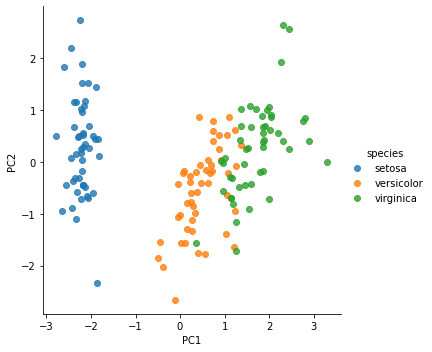

In [11]:
plt.figure(figsize = (5, 5))
sns.lmplot(x = 'PC1', y = 'PC2', 
           data = df2D, 
           hue = 'species', 
           fit_reg = False, 
           legend = True)
plt.show()

In [12]:
print(pca.explained_variance_ratio_)

[0.72770452 0.23030523]


**Xác định số lượng chiều cần rút gọn**

In [13]:
for i in range(1, 5):
    pca = PCA(n_components = i)
    pca.fit_transform(X)

In [14]:
tot = sum(pca.explained_variance_)
var_exp = [(i / tot) * 100 for i in sorted(pca.explained_variance_, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

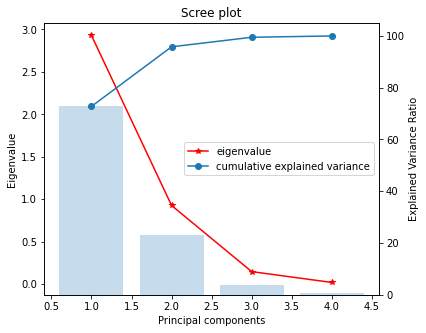

In [29]:
# Scree plot
fig, ax1 = plt.subplots(figsize = (6, 5))

# 1
l1 = ax1.plot(range(1, 5), pca.explained_variance_, marker = '*', color = 'red', label = 'eigenvalue')
ax1.set_title('Scree plot')
ax1.set_xlabel('Principal components')
ax1.set_ylabel('Eigenvalue')

# 2
ax2 = ax1.twinx()
# ax2.bar(range(1, 5), var_exp, alpha = 0.25, align = 'center', label = 'individual explained variance')
# ax2.step(range(1, 5), cum_var_exp, where = 'mid', label = 'cumulative explained variance')
ax2.bar(range(1, 5), var_exp, alpha = 0.25, align = 'center')
l2 = ax2.plot(range(1, 5), cum_var_exp, marker = 'o', label = 'cumulative explained variance')
ax2.set_ylabel('Explained Variance Ratio')

#
lines = l1 + l2
lbls = [l.get_label() for l in lines]
ax1.legend(lines, lbls, loc = 'right')

plt.show()

- Ta thấy, nếu chọn PC1 thì giá trị riêng lớn hơn 1. Khi đó, PC1 chiếm khoảng 73\%  phương sai tích lũy. Nếu chọn thêm PC2, ta sẽ thêm khoảng 23\% . Trong khi đó, PC3 và PC4 chỉ chiếm tỷ lệ rất nhỏ so với PC1 và PC2.

### Giảm số chiều với UMAP

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap

iris = pd.read_csv('iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
features = iris.columns.to_list()
features.remove('species')

In [18]:
species_mapping = {"setosa": 0, "versicolor": 1, "virginica": 2}
iris['species'] = iris['species'].map(species_mapping)

In [19]:
X = iris.loc[:, features].values
y = iris[[ 'species' ]]

In [20]:
col_dict = { 0:'#7bc90c', 1:'#ffb700',2:'#f5072f'}

In [21]:
class_set = y['species'].unique()
class_set

array([0, 1, 2], dtype=int64)

In [22]:
pals = [col_dict[cl] for cl in class_set]

# List of RGB triplets
rgb_values = sns.color_palette(pals, 10)

# Map label to RGB
color_map = dict(zip(class_set, rgb_values))

In [23]:
mapper = umap.UMAP().fit_transform(X)

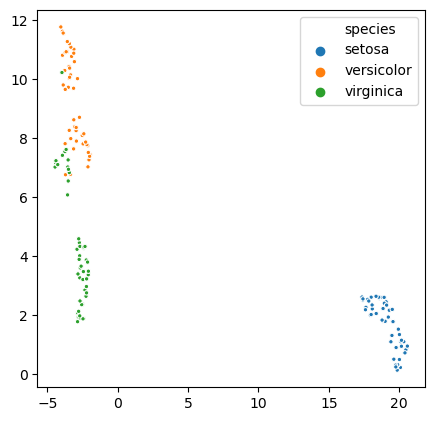

In [24]:
plt.figure(figsize = (5, 5), dpi = 100)

sns.scatterplot(mapper[:, 0], mapper[:, 1], 
                hue = y['species'].map({ 0:'setosa', 1:'versicolor', 2:'virginica' }), 
                s = 10, 
                cmap = color_map)

plt.show()

# Bài tập

- Sinh viên áp dụng thuật toán PCA và UMAP để giảm chiều dữ liệu đối với các tập dữ liệu những buổi học trước.